In [10]:
# Mount the drive if running on colab 
from google.colab import drive
drive.mount('/content/drive')
# Import other required libraries 
import pandas as pd
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
nltk.download('punkt')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [35]:
# Read the dataset with xml summaries and original transcript
read_data = pd.read_excel('/content/drive/MyDrive/summarization_aggregated_data.xlsx').rename(columns={'duration_seconds':'duration_minutes','duration_minutes':'duration_seconds'})

In [36]:
# Find number of sentences and tokens in each transcript
read_data['tokenized_sentence'] = read_data['json_transcript'].apply(lambda x:sent_tokenize(x))
read_data['tokens'] = read_data['json_transcript'].apply(lambda x:list(set(word_tokenize(x.lower()))))
read_data['num_sentences'] = read_data['tokenized_sentence'].apply(lambda x:len(x))
# Find unique vocabulary
vocab = read_data['tokens'].values
unique_vocab = list(set([x for sublist in vocab for x in sublist]))

In [54]:
# Glimpse of the dataset
read_data.head(1)

,xml_filepath,title,summary,description,duration_seconds,duration_minutes,show_filename_prefix,episode_filename_prefix,json_filepath,json_transcript,tokenized_sentence,tokens,num_sentences
0,/content/drive/MyDrive/TREC/spotify-podcasts-2...,Ep.05 Why We Don't Sell Presets,<p>Today on the podcast we go on a JOURNEY! We...,<p>Today on the podcast we go on a JOURNEY! We...,3256,54.2712,show_015DbLwcXu2fK7e9jIfbFo,74t5WREXUbhEKNI89CNSkL,/content/drive/MyDrive/TREC/spotify-podcasts-2...,Welcome back to another episode of tuxedo tim...,[ Welcome back to another episode of tuxedo ti...,"[basically, operating, done, squish, cause, fe...",444


In [55]:
# Look at the podcast duration distribution
read_data['duration_minutes'].describe()

count    917.000000
mean      36.305297
std       23.205357
min        0.595600
25%       16.420767
50%       33.836417
75%       54.457767
max       89.954883
Name: duration_minutes, dtype: float64

In [57]:
# Correspondingly, looking at the number of sentences per podcast
read_data['num_sentences'].describe()

count    917.000000
mean     274.610687
std      159.245711
min        4.000000
25%      137.000000
50%      284.000000
75%      393.000000
max      660.000000
Name: num_sentences, dtype: float64

In [58]:
# Find number of unique words
len(unique_vocab)

51906

array([[<Axes: title={'center': 'num_sentences'}>]], dtype=object)

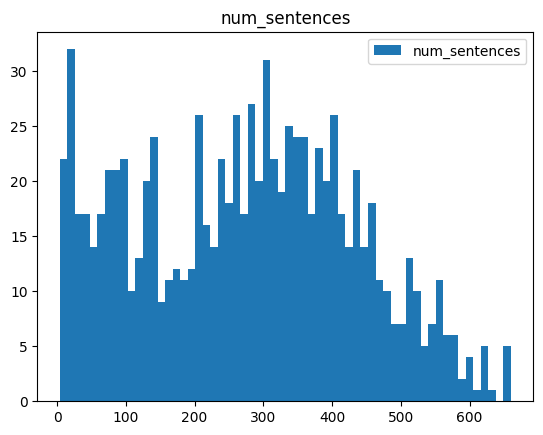

In [59]:
# Plot the number of sentences as a histogram
read_data.hist(column='num_sentences', grid=False, bins=60, legend=True)

array([[<Axes: title={'center': 'duration_minutes'}>]], dtype=object)

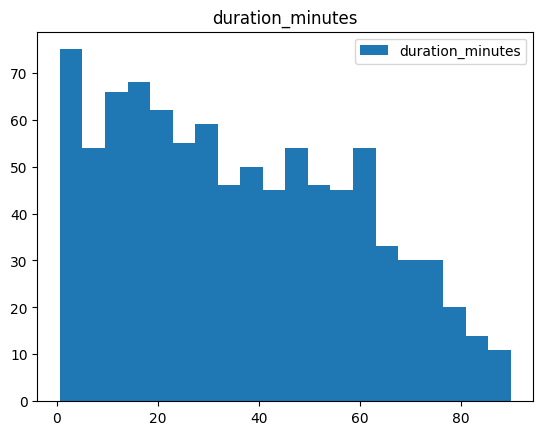

In [52]:
# Plot the duration of the podcast as a histogram
read_data.hist(column='duration_minutes', grid=False, bins=20, legend=True)